<a href="https://colab.research.google.com/github/HeegonJin/ML_study/blob/master/ch5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
    + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [ ]:
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

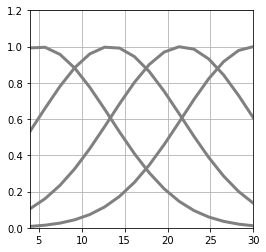

In [ ]:
def gauss(x, mu, s):
  return np.exp(-(x - mu) ** 2 / (2 * s **2))

M = 4
plt.figure(figsize=(4,4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, X_n)
for j in range(M):
  y = gauss(xb, mu[j], s)
  plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

In [ ]:
def gauss_func(w, x):
  m = len(w) - 1
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  y = np.zeros_like(x)
  for j in range(m):
    y = y + w[j] * gauss(x, mu[j], s)
  y = y + w[m]
  return y

In [ ]:
def mse_gauss_func(x, t, w):
  y = gauss_func(w, x)
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
def fit_gauss_func(x, t, m):
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  n = x.shape[0]
  psi = np.ones((n, m+1))
  for j in range(m):
    psi[:, j] = gauss(x, mu[j], s)
  psi_T = np.transpose(psi)

  b = np.linalg.inv(psi_T.dot(psi))
  c = b.dot(psi_T)
  w = c.dot(t)
  return w

In [ ]:
def show_gauss_func(w):
  xb = np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb, y, c=[.5,.5,.5], lw=4)

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


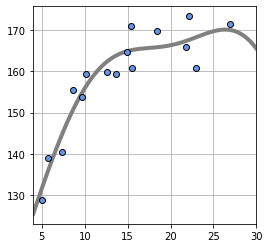

In [ ]:
plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X,T,W)
print('W='+ str(np.round(W, 1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

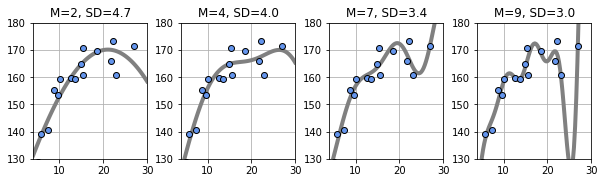

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i+1)
  W = fit_gauss_func(X, T, M[i])
  show_gauss_func(W)
  plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
  plt.xlim(X_min, X_max)
  plt.grid(True)
  plt.ylim(130, 180)
  mse = mse_gauss_func(X, T, W)
  plt.title(f'M={M[i]:d}, SD={np.sqrt(mse):.1f}')
plt.show()

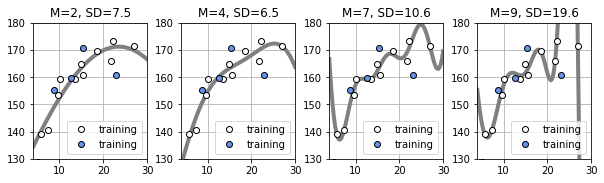

In [ ]:
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
plt.figure(figsize=(10, 2.5))

plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i+1)
  W = fit_gauss_func(X_train, T_train, M[i])
  show_gauss_func(W)
  plt.plot(X_train, T_train, marker='o', linestyle='None', color='white', markeredgecolor='black', label='training')
  plt.plot(X_test, T_test, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black', label='training')
  plt.legend(loc='lower right', fontsize=10, numpoints=1)
  plt.xlim(X_min, X_max)
  plt.ylim(130, 180)
  plt.grid(True)
  mse = mse_gauss_func(X_test, T_test, W)
  plt.title(f'M={M[i]:d}, SD={np.sqrt(mse):.1f}')
plt.show()

In [ ]:
def kfold_gauss_func(x, t, m, k):
  n = x.shape[0]
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n), k) != i]
    t_train = t[np.fmod(range(n), k) != i]
    x_test = x[np.fmod(range(n), k) == i]
    t_test = t[np.fmod(range(n), k) == i]
    wm = fit_gauss_func(x_train, t_train, m)
    mse_train[i] = mse_gauss_func(x_train, t_train, wm)
    mse_test[i] = mse_gauss_func(x_test, t_test, wm)
  return mse_train, mse_test

In [ ]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

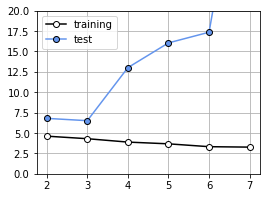

In [ ]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
  Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(4,3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', color ='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', color ='cornflowerblue', markeredgecolor='k', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

In [ ]:
def model_A(x, w):
  y = w[0] - w[1] * np.exp(-w[2] * x)
  return y

def show_model_A(w):
  xb = np.linspace(X_min, X_max, 100)
  y = model_A(xb, w)
  plt.plot(xb, y, c=[.5, .5, .5], lw=4)

def mse_model_A(w, x, t):
  y = model_A(x, w)
  return (np.mean((y-t)**2))

In [ ]:
from scipy.optimize import minimize

def fit_model_A(w_init, x, t):
  res1 = minimize(mse_model_A, w_init, args=(x,t), method="powell")
  return res1.x

W0=169.04047101691262, W1=113.66091392813115, W2=0.21666034162495448
SD=3.9 cm


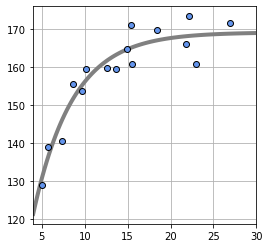

In [ ]:
plt.figure(figsize=(4,4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print(f'W0={W[0]}, W1={W[1]}, W2={W[2]}')
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', c='cornflowerblue', markeredgecolor='k')
plt.xlim(X_min, X_max)
plt.grid(True)
mse=mse_model_A(W, X, T)
print(f'SD={np.sqrt(mse):.1f} cm')
plt.show()

In [ ]:
def kfold_model_A(x, t, k):
  n = len(x)
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(k):
    x_train = x[np.fmod(range(n), k)!= i]
    x_test = x[np.fmod(range(n), k) == i]
    t_train = t[np.fmod(range(n), k)!=i]
    t_test = t[np.fmod(range(n), k)==i]
    wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
    mse_train[i] = mse_model_A(wm, x_train, t_train)
    mse_test[i] = mse_model_A(wm, x_test, t_test)
  return mse_train, mse_test

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


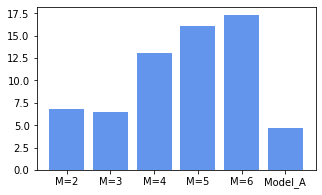

In [ ]:
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print(f'Gauss(M=3) SD={mean_Gauss_test[1]:.2f} cm')
print(f'Model A SD={mean_A_test:.2f} cm')
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model_A"]
plt.figure(figsize=(5,3))
plt.bar(M, SD, tick_label=label, align='center', facecolor='cornflowerblue')
plt.show()